### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder



### 1. Open Typeform Data from Survey

In [2]:
df = pd.read_csv("../data/typeform_igb.csv")

df.head()

,#,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,...,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?,¿Sabes cuánto dinero gastas en tu consumo de agua al mes?,Start Date (UTC),Submit Date (UTC),Network ID,Tags;
0,cb2hsyhk4q48anbuacl1cb2hspesvqca,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,...,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!,2023-05-18 05:55:47,2023-05-18 05:58:06,31494a64d0,;,NaN
1,1lvp0ymwpl878xcfgo1lvp0yhw1vy0ld,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,...,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!,2023-05-18 05:36:34,2023-05-18 05:38:17,26873d694b,;,NaN
2,t5e8kn9ug41t5zdgpgnt5e8kn9dx7xba,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,...,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!,2023-05-18 05:31:31,2023-05-18 05:33:35,6050316def,;,NaN
3,lhrk180jtc1swhx2plhrk18wntdhnix6,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,...,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!,2023-05-18 05:22:13,2023-05-18 05:23:42,903866689d,;,NaN
4,6mv5t8yarw67kj343annxsb6mv5t8yhx,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,...,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €,2023-05-18 05:05:50,2023-05-18 05:08:08,1acecc257c,;,NaN


### Lets remove some unnecesary columns that disturb us

In [3]:
# Drop the first column and last two columns
df = df.drop(df.columns[0], axis=1)  
df = df.iloc[:, :-5] 

df.head()

,¿En qué rango de edad te encuentras?,¿Cuántas personas sois en vuestro hogar?,¿En qué provincia vives? Vamos a conocernos un poco mejor 😄,¿De cuál de estos temas te interesaría saber más?,¿Cuánto duran tus duchas?,¿Cuántas veces pones la lavadora a la semana?,¿Cuántas veces pones el lavavajillas?,¿Sueles poner el modo *ECO *en tus electrodomésticos?,¿Reciclas agua para usarlo en otras tareas?,¿*Reciclas *vidrio,"cartón y plástico?""""",¿Cada cuánto consumes *carne*?,¿Cuántos km haces a la semana en coche?,¿Cuánto gastas al mes en comida para gato/perro?,¿Cuántos metros cuadrados tiene tu jardín?
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


## 2. Exploratory Data Analysis

### Feature and Target Analysis

The dataset contains a list of Spanish residents behaviour of their personal water consumption.

**Features:**

1. Age: 4 groups of age
2. Residents: Number of people who live in a home.
3. Province: What part of Spain are you from.
4. Interests: 
5. Shower
6. Washing machine
7. Dishwasher
8. Eco Mode
9. Water recycling
10. General recycling
11. Meat Consumption
12. Gasoline
13. Pet
14. Garden area
15. Water estimation spent

**Targets:**

We do not now yet. 

* Expected groups:
    * 0: Water Saver 
    * 1: Water Spender
    * 2: Water unconscious

### Rename columns

In [4]:
list = [ "Age",
 "Residents",
 "Province",
 "Interests",
 "Shower",
 "WashingMachine",
 "DishWasher",
 "EcoMode",
 "WaterRecycling",
 "GeneralRecycling",
 "Meat",
 "Gasoline",
 "Pet",
"Garden",
 "Estimation"]

for index,name in enumerate(list):
    df.rename(columns={df.columns[index]: name}, inplace=True)

df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


### Paint some Data 👨🏻‍🎨

In [5]:
# PAIR PLOT

colors = [ '#ee6c4d', '#98c1d9', '#3d5a80', '#293241']
sns.set_palette(sns.color_palette(colors))

Age
Entre 36 y 65 años    652
Entre 18 y 35 años    425
Mayor de 65 años       82
Menor de 18 años       19
NaN                     5
Name: count, dtype: int64


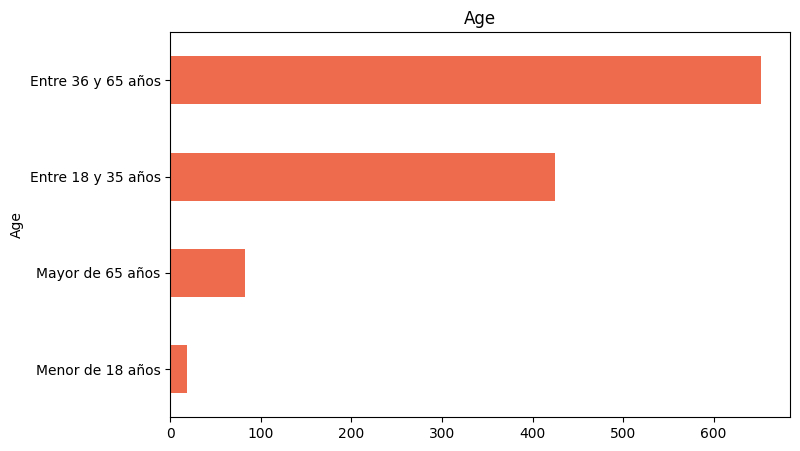

Residents
2.0     354
4.0     293
3.0     287
1.0     118
5.0      99
6.0      16
7.0       6
NaN       5
8.0       3
10.0      2
Name: count, dtype: int64


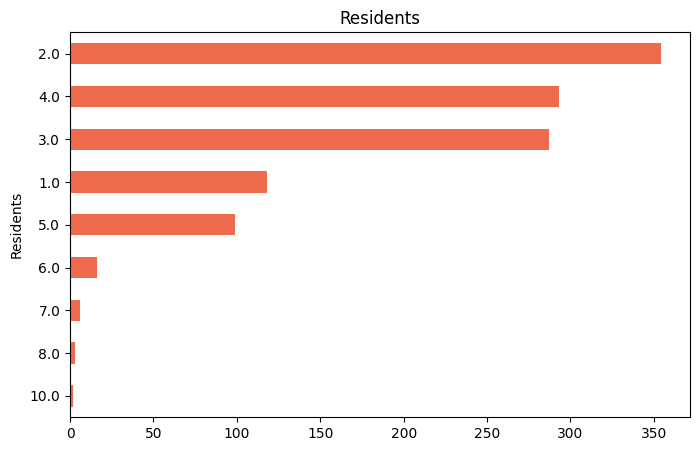

Province
Madrid                    638
Segovia                   201
Asturias                   49
Barcelona                  36
Sevilla                    27
Toledo                     22
Cantabria                  15
Valladolid                 15
Cádiz                      14
A Coruña                   10
Zaragoza                   10
Málaga                      9
Murcia                      7
Valencia                    7
Pontevedra                  7
Huesca                      7
Vizcaya                     6
Alicante                    6
Burgos                      5
Jaén                        5
Lugo                        5
Gipuzkoa                    5
Las Palmas                  5
Salamanca                   4
León                        4
Girona                      4
Ávila                       4
Huelva                      4
La Rioja                    3
Badajoz                     3
Albacete                    3
NaN                         3
Tarragona                   3
Á

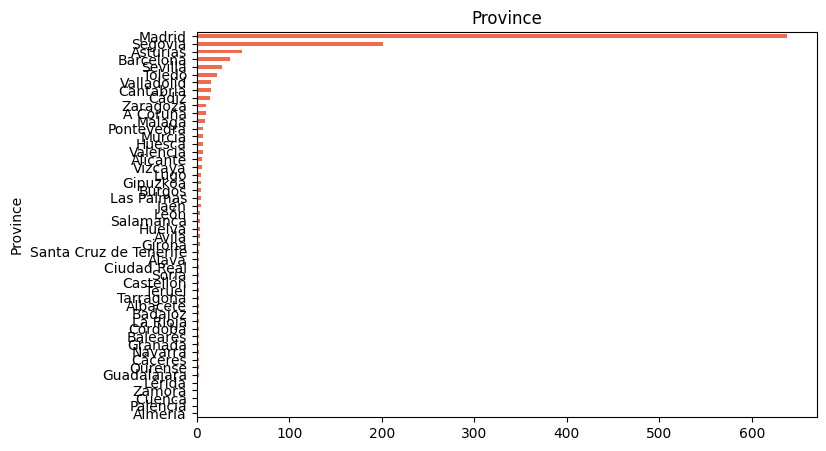

Interests
Ayudar al ecosistema         443
Ahorrar agua                 326
Ahorrar dinero               269
Conocer mi huella hídrica    142
NaN                            3
Name: count, dtype: int64


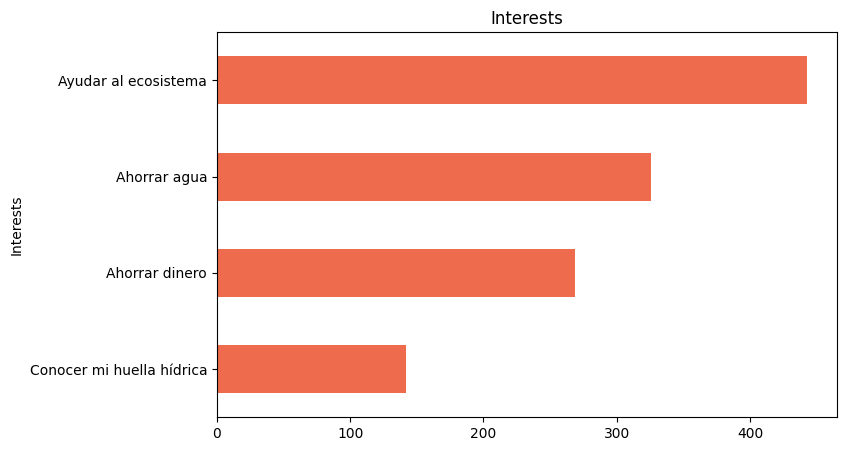

Shower
Entre 5 y 10 minutos     595
Menos de 5 minutos       411
Entre 11 y 15 minutos    136
Más de 15 minutos         38
NaN                        3
Name: count, dtype: int64


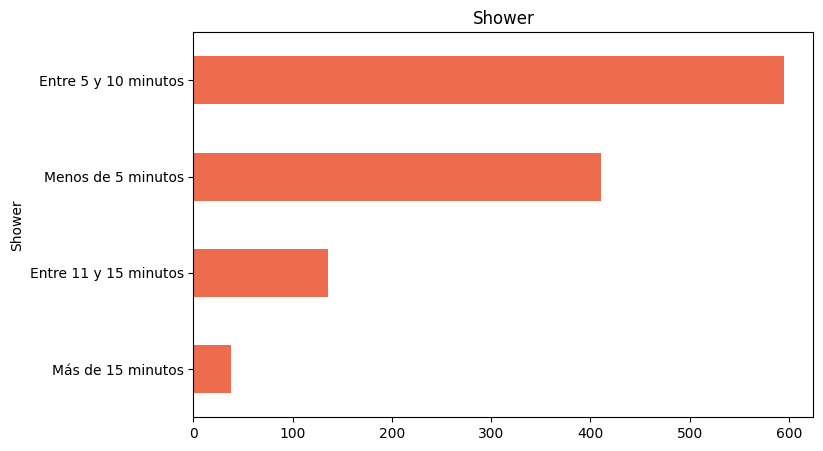

WashingMachine
Menos de 3 veces     638
Entre 3 y 5 veces    421
Más de 5             121
NaN                    3
Name: count, dtype: int64


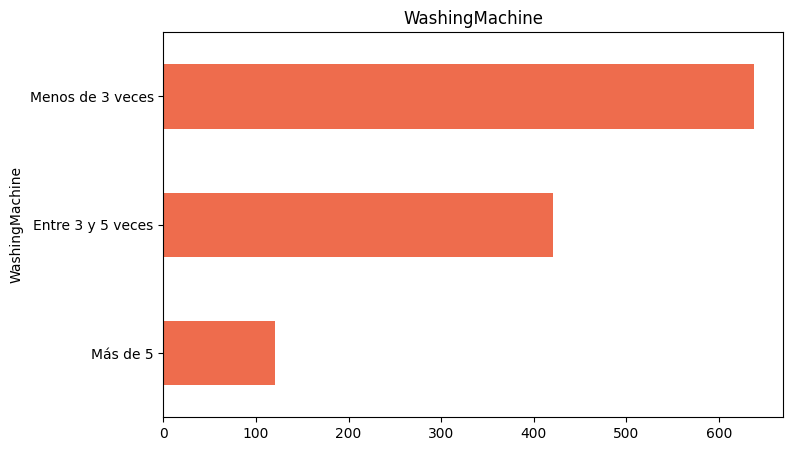

DishWasher
Entre 3 y 5 a la semana    603
Friego a mano              348
1 vez al día               229
NaN                          3
Name: count, dtype: int64


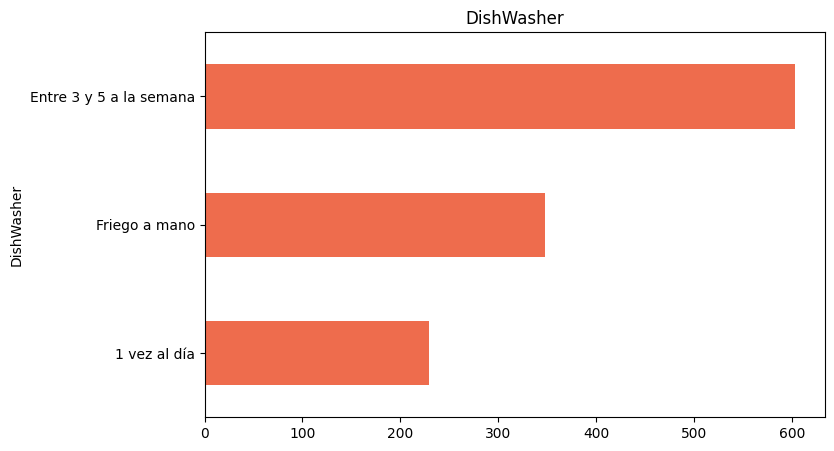

EcoMode
Siempre                          549
A veces                          475
No sabía que existía ese modo    156
NaN                                3
Name: count, dtype: int64


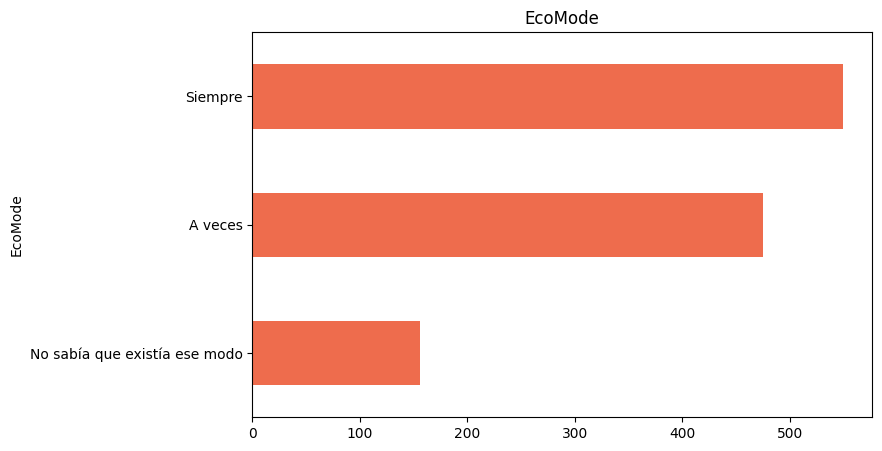

WaterRecycling
No                             605
Si                             350
Buena idea! Voy a probarlo!    225
NaN                              3
Name: count, dtype: int64


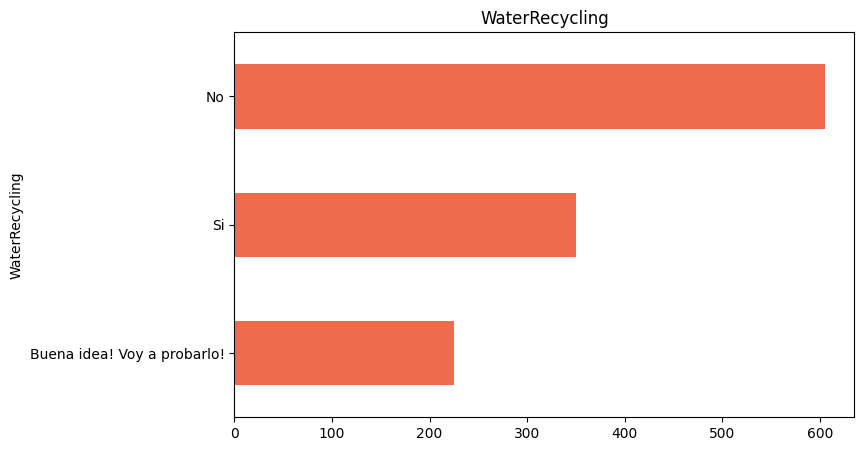

GeneralRecycling
Siempre    829
A veces    294
Nunca!      57
NaN          3
Name: count, dtype: int64


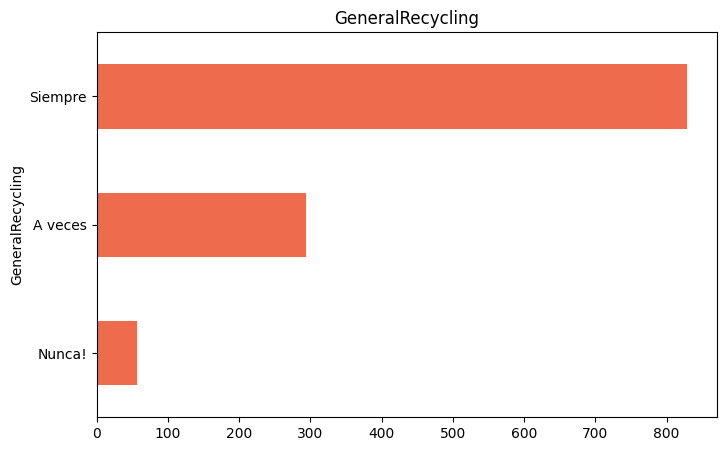

Meat
1 vez cada 3 días    575
1 vez al día         376
1 vez a la semana    190
Nunca!                39
NaN                    3
Name: count, dtype: int64


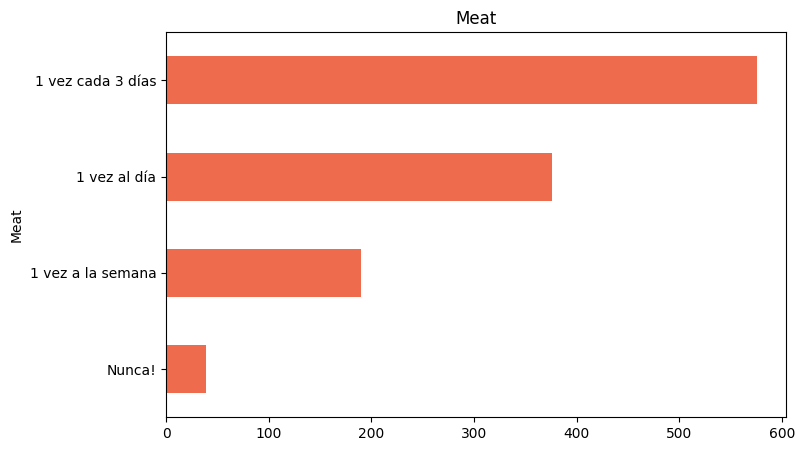

Gasoline
Menos de 100 km    538
No uso coche       289
100 - 200 km       212
Más de 200 km      141
NaN                  3
Name: count, dtype: int64


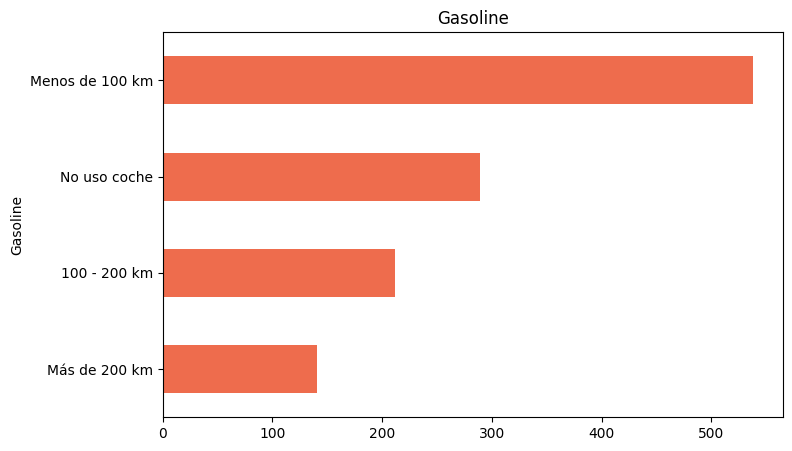

Pet
No tengo mascota    756
Menos de 50 €       265
Entre 50 y 100 €    143
Más de 100 €         16
NaN                   3
Name: count, dtype: int64


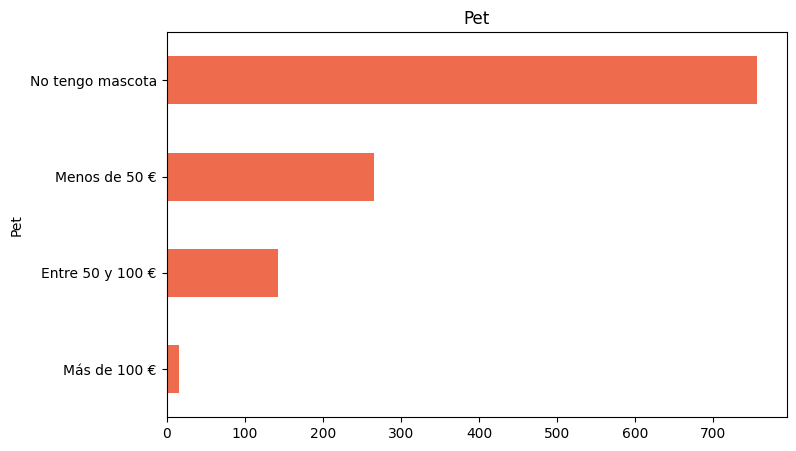

Garden
0              805
NaN             66
50              20
10              18
100             17
              ... 
75               1
2.0              1
6                1
300m             1
Ojalá tener      1
Name: count, Length: 96, dtype: int64


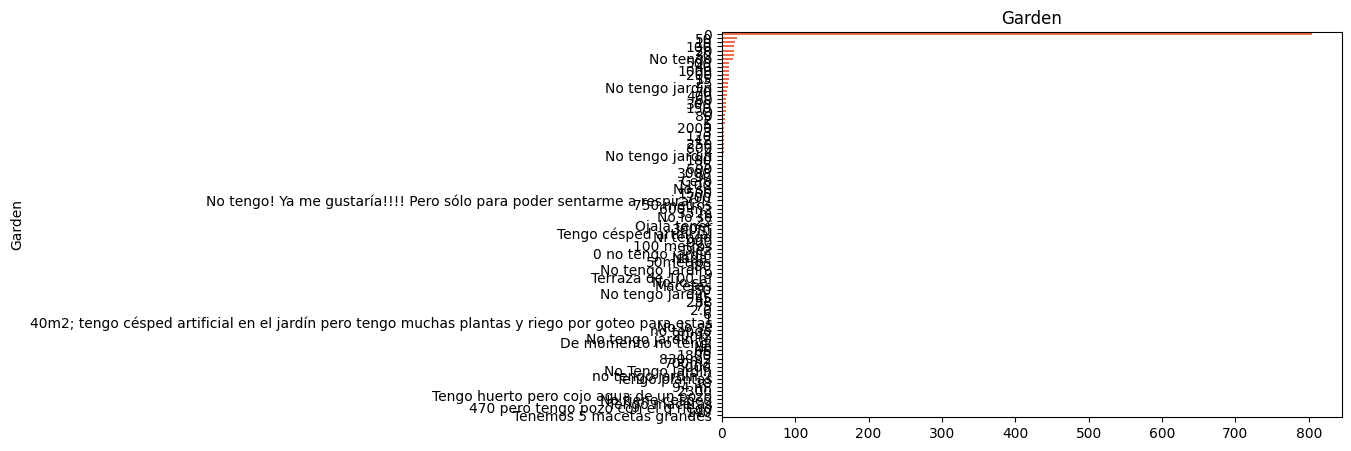

Estimation
Entre 10€ y 40 €    594
Ni idea!            333
Más de 40 €         163
Menos de 10 €        88
NaN                   5
Name: count, dtype: int64


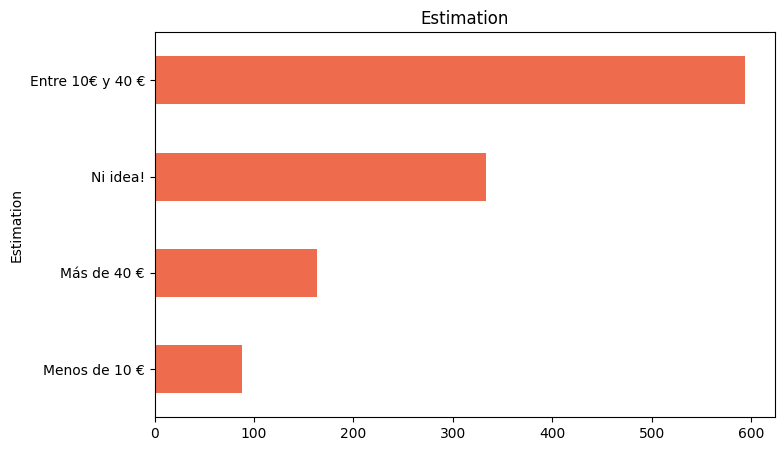

In [6]:
def plot_graph (column):
    print(df[column].value_counts(dropna= False))
    plt.figure(figsize=(8, 5))
    df[column].value_counts().sort_values(ascending=True).plot(kind='barh', ylabel= None, title= str(column))
    plt.show()


for i in list:
    plot_graph(i)


#### Check and Handle NaN



In [7]:
# All columns are type object, except residents float64

# Check for any NaN in df
print("Original length of df: ",len(df))
df.isna().sum()

Original length of df:  1183


Age                  5
Residents            5
Province             3
Interests            3
Shower               3
WashingMachine       3
DishWasher           3
EcoMode              3
WaterRecycling       3
GeneralRecycling     3
Meat                 3
Gasoline             3
Pet                  3
Garden              66
Estimation           5
dtype: int64

In [8]:
df.head()

,Age,Residents,Province,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Entre 36 y 65 años,4.0,Madrid,Ayudar al ecosistema,Entre 5 y 10 minutos,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,1 vez al día,Más de 200 km,No tengo mascota,0,Ni idea!
1,Entre 36 y 65 años,3.0,Segovia,Ayudar al ecosistema,Menos de 5 minutos,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,1 vez cada 3 días,Menos de 100 km,No tengo mascota,300,Ni idea!
2,Entre 36 y 65 años,2.0,Segovia,Ahorrar dinero,Menos de 5 minutos,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,1 vez a la semana,100 - 200 km,No tengo mascota,0,Ni idea!
3,Entre 18 y 35 años,2.0,Segovia,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,Siempre,No,A veces,1 vez al día,Menos de 100 km,No tengo mascota,0,Ni idea!
4,Entre 36 y 65 años,2.0,Madrid,Ahorrar agua,Entre 5 y 10 minutos,Menos de 3 veces,Friego a mano,A veces,Si,Siempre,1 vez cada 3 días,No uso coche,No tengo mascota,2,Entre 10€ y 40 €


### Feature Engineering

In [9]:
# Pet: we are interested in knowing if they have or not.
df.loc[df["Pet"] == 'No tengo mascota', "Pet"] = "No"
df.loc[df["Pet"] != 'No', "Pet"] = "Yes"

### Car: we are interested in knowing if they use the car or not.
df.loc[df["Gasoline"] == 'No uso coche', "Gasoline"] = "No"
df.loc[df["Gasoline"] != 'No', "Gasoline"] = "Yes"

# Meat: we are interested in knowing if they are meat eaters or not.
df.loc[df["Meat"] == 'Nunca!', "Meat"] = "No"
df.loc[df["Meat"] == '1 vez a la semana', "Meat"] = "No"
df.loc[df["Meat"] != 'No', "Meat"] = "Yes"

# Estimation: we are interested in knowing if they are aware with their water expenditure or not.
df.loc[df["Estimation"] == 'Ni idea!', "Estimation"] = "No"
df.loc[df["Estimation"] != 'No', "Estimation"] = "Yes"

# WaterRecylcing: Include will try and yes => yes.
df.loc[df["WaterRecycling"] != 'No', "WaterRecycling"] = "Yes"


# Age: Yound and Old.
df.loc[df["Age"] == 'Entre 36 y 65 años', "Age"] = "Old"
df.loc[df["Age"] == 'Mayor de 65 años', "Age"] = "Old"
df.loc[df["Age"] != 'Old', "Age"] = "Young"



# Shower: 3 ranges.
df.loc[df["Shower"] == 'Menos de 5 minutos', "Shower"] = "Saver"
df.loc[df["Shower"] == 'Entre 5 y 10 minutos', "Shower"] = "Medium"
df.loc[df["Shower"] == 'Entre 11 y 15 minutos', "Shower"] = "Large"
df.loc[df["Shower"] == 'Más de 15 minutos', "Shower"] = "Large"



# Eliminar

df.drop(columns=["Residents","Province"], inplace=True)
 
# Provincias
# Residents



GeneralRecycling
Siempre    829
A veces    294
Nunca!      57
NaN          3
Name: count, dtype: int64


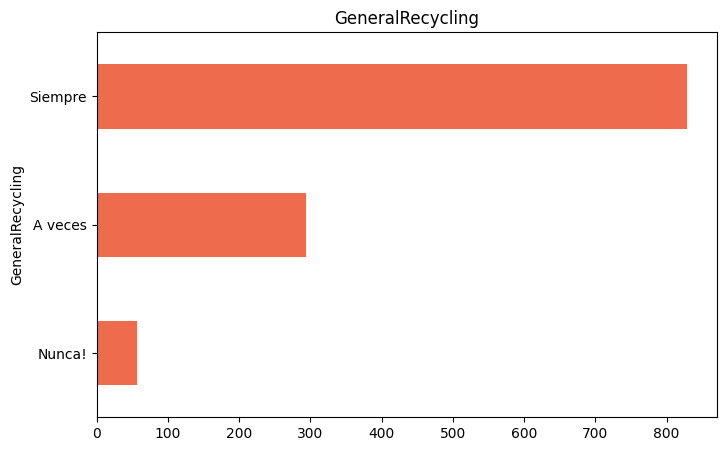

In [10]:
plot_graph("GeneralRecycling")

### Lets look into Garden column 🌷

In [11]:
#Primero necesitamos convertir la columna a str
df['Garden'] = df['Garden'].astype(str)

#Nos ayudamos de expresiones regulares
import re
def transformar_registro(registro):
    if registro.isdigit():
        return int(registro)
    else:
        numero_encontrado = re.search(r'\d+', registro)
        if numero_encontrado:
            return int(numero_encontrado.group())
        else:
            return 0
            
#hacemos la transformación correspondiente
df['Garden'] = df['Garden'].apply(transformar_registro)


In [12]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,0,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,300,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,0,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,0,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,2,Yes


In [13]:
# Shower: 3 ranges.
df.loc[df["Garden"] == 0, "Garden"] = "No"
df.loc[df["Garden"] != "No", "Garden"] = "Yes"

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1183 non-null   object
 1   Interests         1180 non-null   object
 2   Shower            1180 non-null   object
 3   WashingMachine    1180 non-null   object
 4   DishWasher        1180 non-null   object
 5   EcoMode           1180 non-null   object
 6   WaterRecycling    1183 non-null   object
 7   GeneralRecycling  1180 non-null   object
 8   Meat              1183 non-null   object
 9   Gasoline          1183 non-null   object
 10  Pet               1183 non-null   object
 11  Garden            1183 non-null   object
 12  Estimation        1183 non-null   object
dtypes: object(13)
memory usage: 120.3+ KB


In [14]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,No,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,Yes,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,No,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,No,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,Yes,Yes


Garden
No     928
Yes    255
Name: count, dtype: int64


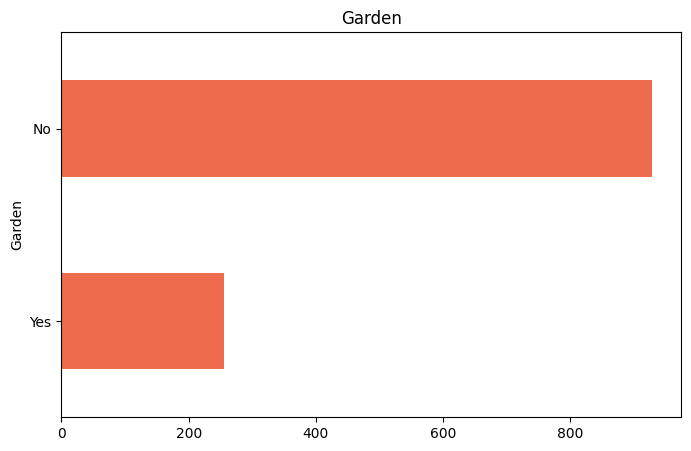

In [15]:
plot_graph("Garden")

In [16]:
# Check for any NaN in df
print("Original length of df: ",len(df))
df.isna().sum()

Original length of df:  1183


Age                 0
Interests           3
Shower              3
WashingMachine      3
DishWasher          3
EcoMode             3
WaterRecycling      0
GeneralRecycling    3
Meat                0
Gasoline            0
Pet                 0
Garden              0
Estimation          0
dtype: int64

In [17]:
# Save Garden results in Excel to view ALL of them
# values = df["Garden"]
# values.to_excel(r'./results/garden_clean.xlsx',sheet_name='train', index=False)

In [18]:
# Remove rows with NaN values
df = df.dropna()

print("Length with NaN removed: ",len(df))
# Check all are removed
df.isna().sum()

Length with NaN removed:  1180


Age                 0
Interests           0
Shower              0
WashingMachine      0
DishWasher          0
EcoMode             0
WaterRecycling      0
GeneralRecycling    0
Meat                0
Gasoline            0
Pet                 0
Garden              0
Estimation          0
dtype: int64

## Check All modified columns

Age
Old      734
Young    446
Name: count, dtype: int64


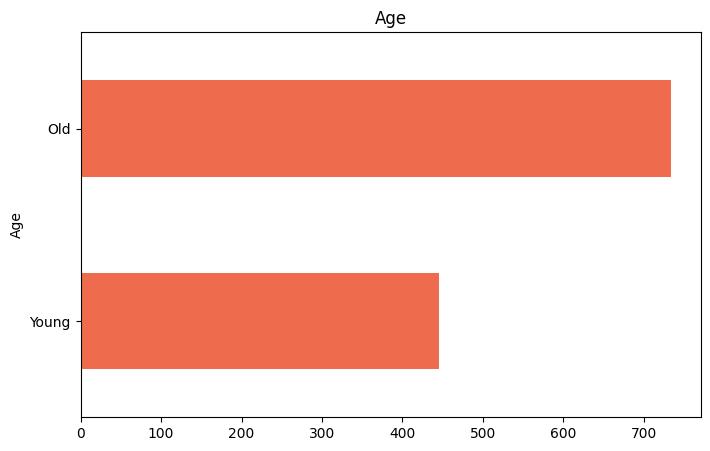

Interests
Ayudar al ecosistema         443
Ahorrar agua                 326
Ahorrar dinero               269
Conocer mi huella hídrica    142
Name: count, dtype: int64


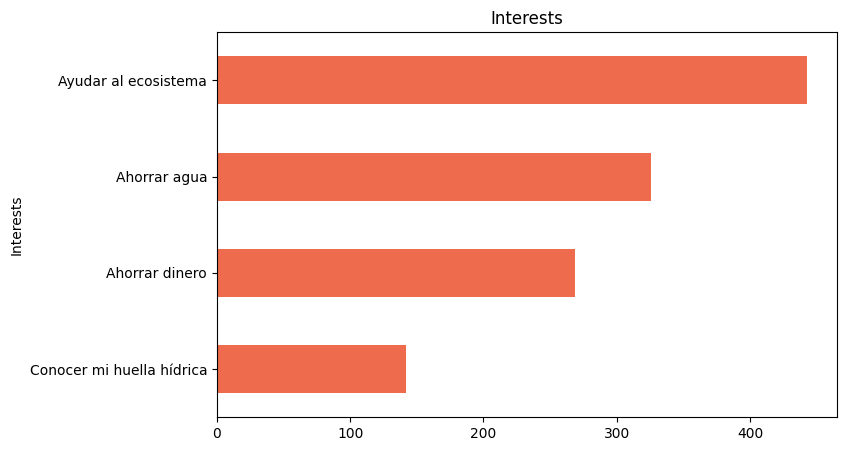

Shower
Medium    595
Saver     411
Large     174
Name: count, dtype: int64


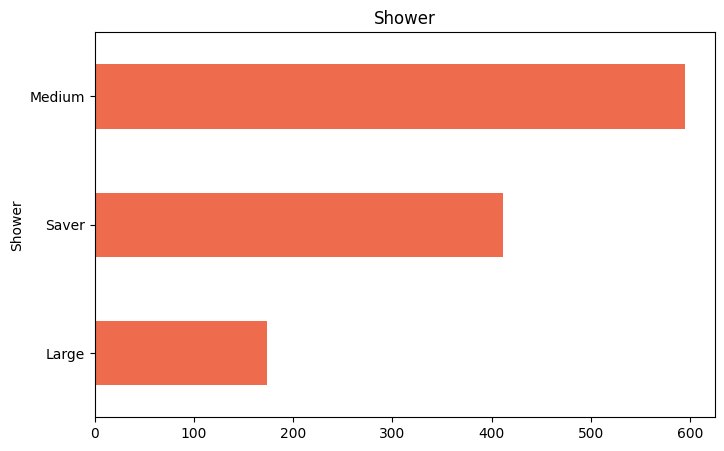

WashingMachine
Menos de 3 veces     638
Entre 3 y 5 veces    421
Más de 5             121
Name: count, dtype: int64


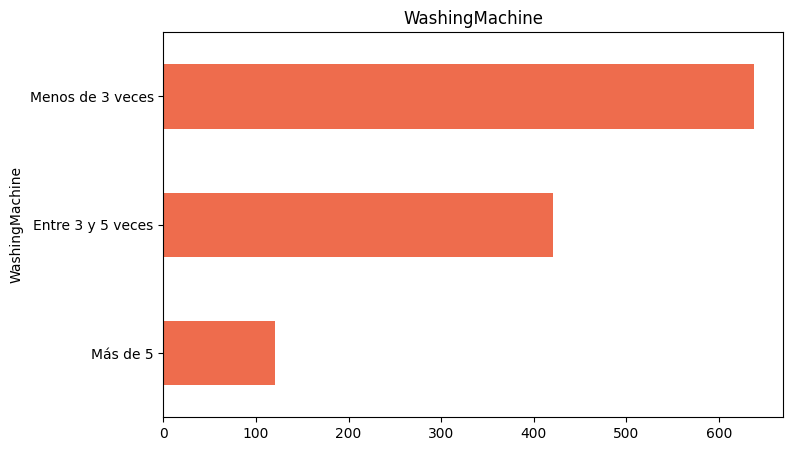

DishWasher
Entre 3 y 5 a la semana    603
Friego a mano              348
1 vez al día               229
Name: count, dtype: int64


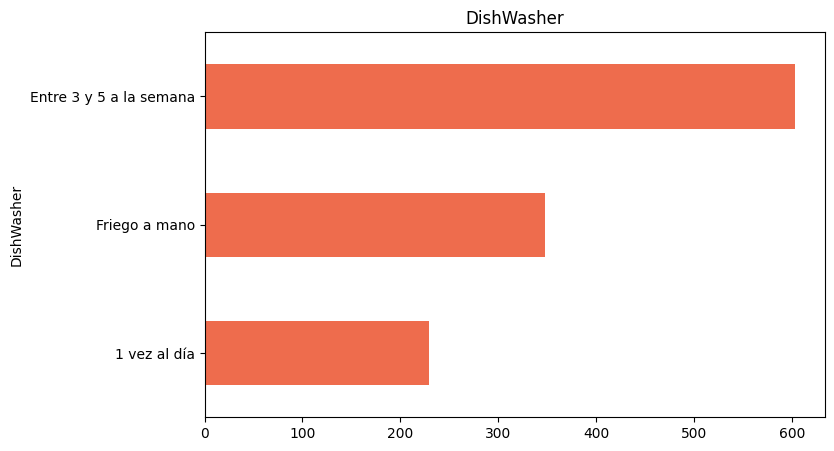

EcoMode
Siempre                          549
A veces                          475
No sabía que existía ese modo    156
Name: count, dtype: int64


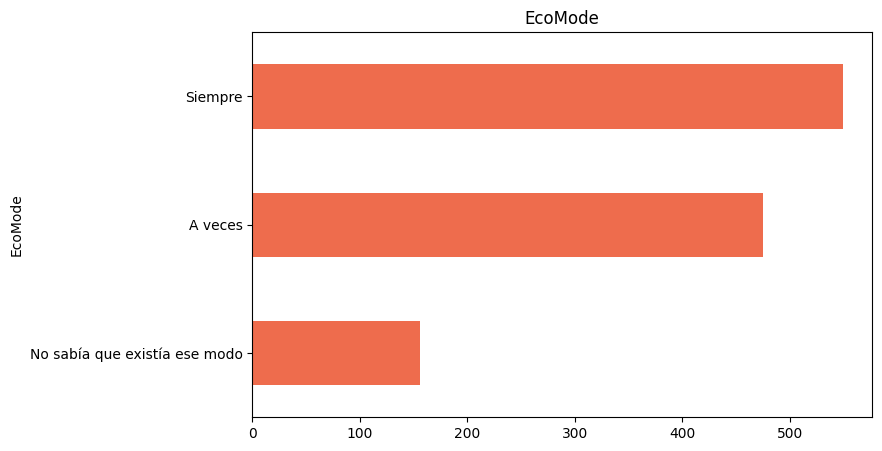

WaterRecycling
No     605
Yes    575
Name: count, dtype: int64


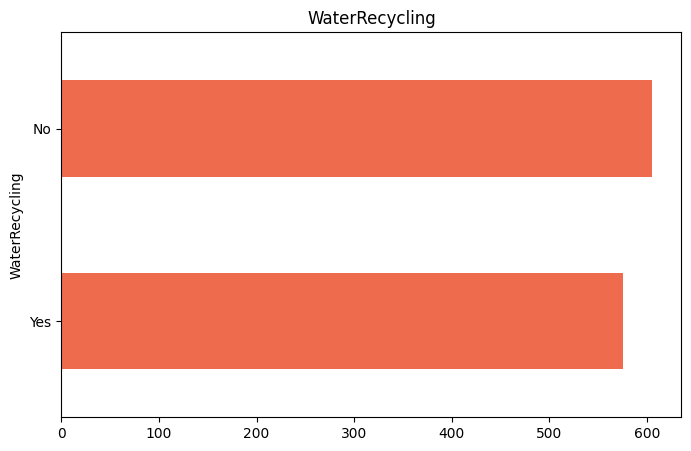

GeneralRecycling
Siempre    829
A veces    294
Nunca!      57
Name: count, dtype: int64


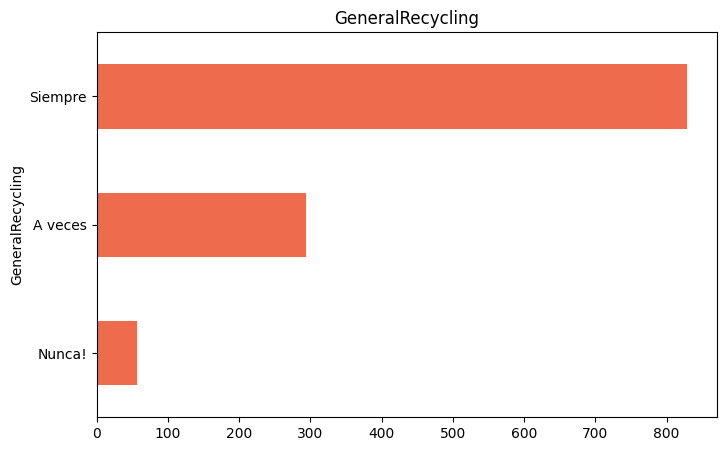

Meat
Yes    951
No     229
Name: count, dtype: int64


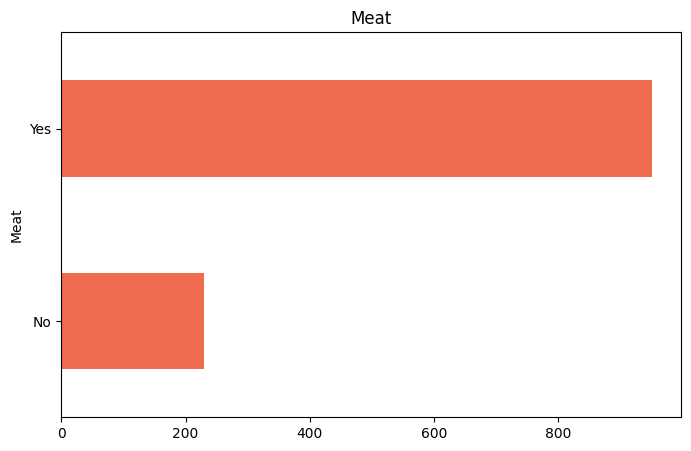

Gasoline
Yes    891
No     289
Name: count, dtype: int64


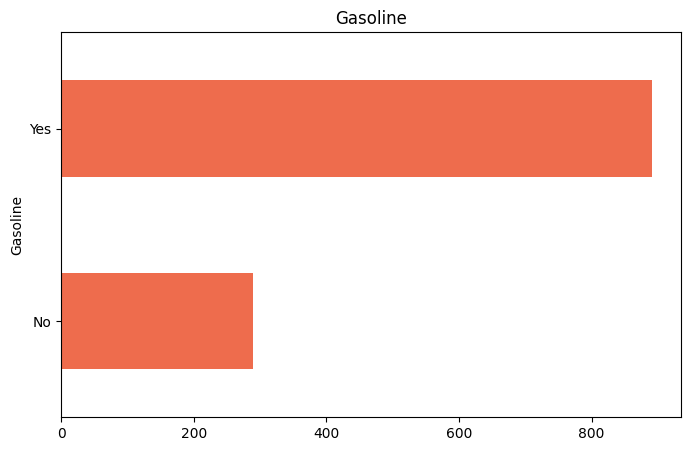

Pet
No     756
Yes    424
Name: count, dtype: int64


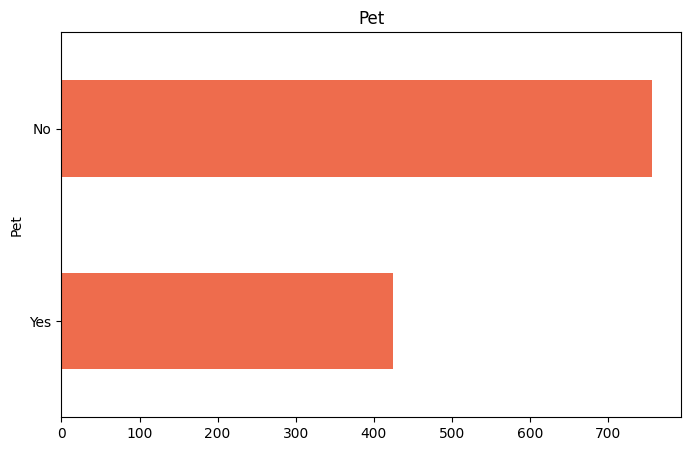

Garden
No     925
Yes    255
Name: count, dtype: int64


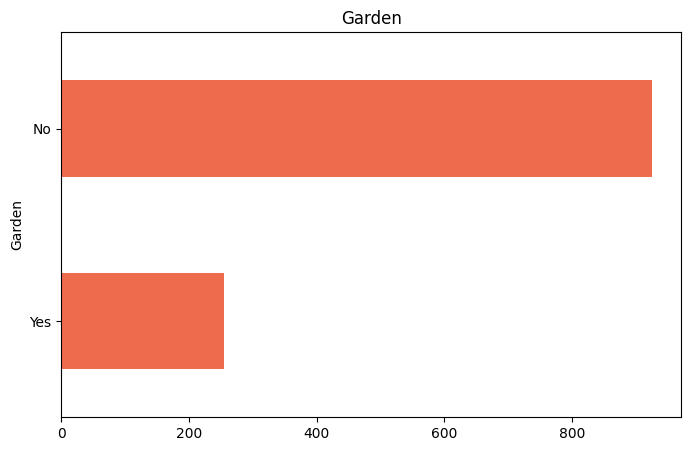

Estimation
Yes    847
No     333
Name: count, dtype: int64


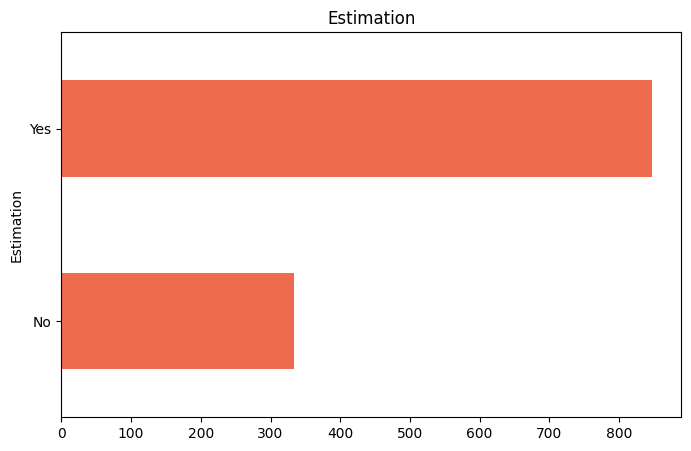

In [19]:
list_modified = [ "Age",
 "Interests",
 "Shower",
 "WashingMachine",
 "DishWasher",
 "EcoMode",
 "WaterRecycling",
 "GeneralRecycling",
 "Meat",
 "Gasoline",
 "Pet",
"Garden",
 "Estimation"]



def plot_graph (column):
    print(df[column].value_counts(dropna= False))
    plt.figure(figsize=(8, 5))
    df[column].value_counts().sort_values(ascending=True).plot(kind='barh', ylabel= None, title= str(column))
    plt.show()


for i in list_modified:
    plot_graph(i)

---


# Machine Learning

In [20]:
df.head()

,Age,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Pet,Garden,Estimation
0,Old,Ayudar al ecosistema,Medium,Entre 3 y 5 veces,Entre 3 y 5 a la semana,A veces,No,Siempre,Yes,Yes,No,No,No
1,Old,Ayudar al ecosistema,Saver,Menos de 3 veces,Entre 3 y 5 a la semana,Siempre,No,A veces,Yes,Yes,No,Yes,No
2,Old,Ahorrar dinero,Saver,Menos de 3 veces,Friego a mano,No sabía que existía ese modo,No,A veces,No,Yes,No,No,No
3,Young,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,Siempre,No,A veces,Yes,Yes,No,No,No
4,Old,Ahorrar agua,Medium,Menos de 3 veces,Friego a mano,A veces,Yes,Siempre,Yes,No,No,Yes,Yes


### Transmitting human intention (eco friendly) to Machine Learning model

In [21]:
# # ECO FRIENDLY => 0
# # MENOS ECO => 1
# # MENOS MENOS ECO => 2

# Gasoline
df.loc[df["Gasoline"] == "Yes", "Gasoline"] = 1
df.loc[df["Gasoline"] == "No", "Gasoline"] = 0

# Interests
df.loc[df["Interests"] == "Ayudar al ecosistema", "Interests"] = 0
df.loc[df["Interests"] == "Ahorrar agua", "Interests"] = 0
df.loc[df["Interests"] == "Conocer mi huella hídrica", "Interests"] = 1
df.loc[df["Interests"] == "Ahorrar dinero", "Interests"] = 2

# WaterRecycling
df.loc[df["WaterRecycling"] == "Yes", "WaterRecycling"] = 0
df.loc[df["WaterRecycling"] == "No", "WaterRecycling"] = 1

# Meat
df.loc[df["Meat"] == "No", "Meat"] = 0
df.loc[df["Meat"] == "Yes", "Meat"] = 1

# Shower
df.loc[df["Shower"] == "Saver", "Shower"] = 0
df.loc[df["Shower"] == "Medium", "Shower"] = 1
df.loc[df["Shower"] == "Large", "Shower"] = 2

# WashingMachine
df.loc[df["WashingMachine"] == "Menos de 3 veces", "WashingMachine"] = 0
df.loc[df["WashingMachine"] == "Entre 3 y 5 veces", "WashingMachine"] = 1
df.loc[df["WashingMachine"] == "Más de 5", "WashingMachine"] = 2

# DishWasher
df.loc[df["DishWasher"] == "1 vez al día", "DishWasher"] = 0
df.loc[df["DishWasher"] == "Entre 3 y 5 a la semana", "DishWasher"] = 1
df.loc[df["DishWasher"] == "Friego a mano", "DishWasher"] = 2

# EcoMode
df.loc[df["EcoMode"] == "Siempre", "EcoMode"] = 0
df.loc[df["EcoMode"] == "A veces", "EcoMode"] = 1
df.loc[df["EcoMode"] == "No sabía que existía ese modo", "EcoMode"] = 2

# GeneralRecycling
df.loc[df["GeneralRecycling"] == "Siempre", "GeneralRecycling"] = 0
df.loc[df["GeneralRecycling"] == "A veces", "GeneralRecycling"] = 1
df.loc[df["GeneralRecycling"] == "Nunca!", "GeneralRecycling"] = 2


In [22]:
# # ECO FRIENDLY => 2
# # MENOS ECO => 3
# # MENOS MENOS ECO => 4

# # Gasoline
# df.loc[df["Gasoline"] == "Yes", "Gasoline"] = 3
# df.loc[df["Gasoline"] == "No", "Gasoline"] = 4

# # Interests
# df.loc[df["Interests"] == "Ayudar al ecosistema", "Interests"] = 2
# df.loc[df["Interests"] == "Ahorrar agua", "Interests"] = 2
# df.loc[df["Interests"] == "Conocer mi huella hídrica", "Interests"] = 3
# df.loc[df["Interests"] == "Ahorrar dinero", "Interests"] = 4

# # WaterRecycling
# df.loc[df["WaterRecycling"] == "Yes", "WaterRecycling"] = 2
# df.loc[df["WaterRecycling"] == "No", "WaterRecycling"] = 3

# # Meat
# df.loc[df["Meat"] == "No", "Meat"] = 2
# df.loc[df["Meat"] == "Yes", "Meat"] = 3

# # Shower
# df.loc[df["Shower"] == "Saver", "Shower"] = 2
# df.loc[df["Shower"] == "Medium", "Shower"] = 3
# df.loc[df["Shower"] == "Large", "Shower"] = 4

# # WashingMachine
# df.loc[df["WashingMachine"] == "Menos de 3 veces", "WashingMachine"] = 2
# df.loc[df["WashingMachine"] == "Entre 3 y 5 veces", "WashingMachine"] = 3
# df.loc[df["WashingMachine"] == "Más de 5", "WashingMachine"] = 4

# # DishWasher
# df.loc[df["DishWasher"] == "1 vez al día", "DishWasher"] = 2
# df.loc[df["DishWasher"] == "Entre 3 y 5 a la semana", "DishWasher"] = 3
# df.loc[df["DishWasher"] == "Friego a mano", "DishWasher"] = 4

# # EcoMode
# df.loc[df["EcoMode"] == "Siempre", "EcoMode"] = 2
# df.loc[df["EcoMode"] == "A veces", "EcoMode"] = 3
# df.loc[df["EcoMode"] == "No sabía que existía ese modo", "EcoMode"] = 4

# # GeneralRecycling
# df.loc[df["GeneralRecycling"] == "Siempre", "GeneralRecycling"] = 2
# df.loc[df["GeneralRecycling"] == "A veces", "GeneralRecycling"] = 3
# df.loc[df["GeneralRecycling"] == "Nunca!", "GeneralRecycling"] = 4

### One-hot encoding



In [23]:
df = pd.get_dummies(df, columns= ["Age","Estimation","Pet","Garden"])

df.head()

,Interests,Shower,WashingMachine,DishWasher,EcoMode,WaterRecycling,GeneralRecycling,Meat,Gasoline,Age_Old,Age_Young,Estimation_No,Estimation_Yes,Pet_No,Pet_Yes,Garden_No,Garden_Yes
0,0,1,1,1,1,1,0,1,1,True,False,True,False,True,False,True,False
1,0,0,0,1,0,1,1,1,1,True,False,True,False,True,False,False,True
2,2,0,0,2,2,1,1,0,1,True,False,True,False,True,False,True,False
3,0,1,0,2,0,1,1,1,1,False,True,True,False,True,False,True,False
4,0,1,0,2,1,0,0,1,0,True,False,False,True,True,False,False,True


### Transform column type for k-means

In [24]:
# df.columns = df.columns.astype('int64')


In [25]:
df.columns

Index(['Interests', 'Shower', 'WashingMachine', 'DishWasher', 'EcoMode',
       'WaterRecycling', 'GeneralRecycling', 'Meat', 'Gasoline', 'Age_Old',
       'Age_Young', 'Estimation_No', 'Estimation_Yes', 'Pet_No', 'Pet_Yes',
       'Garden_No', 'Garden_Yes'],
      dtype='object')

In [26]:
column_name = df.select_dtypes(include=['uint8',"object"]).columns
df[column_name] = df[column_name].astype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1180 entries, 0 to 1182
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Interests         1180 non-null   int64
 1   Shower            1180 non-null   int64
 2   WashingMachine    1180 non-null   int64
 3   DishWasher        1180 non-null   int64
 4   EcoMode           1180 non-null   int64
 5   WaterRecycling    1180 non-null   int64
 6   GeneralRecycling  1180 non-null   int64
 7   Meat              1180 non-null   int64
 8   Gasoline          1180 non-null   int64
 9   Age_Old           1180 non-null   bool 
 10  Age_Young         1180 non-null   bool 
 11  Estimation_No     1180 non-null   bool 
 12  Estimation_Yes    1180 non-null   bool 
 13  Pet_No            1180 non-null   bool 
 14  Pet_Yes           1180 non-null   bool 
 15  Garden_No         1180 non-null   bool 
 16  Garden_Yes        1180 non-null   bool 
dtypes: bool(8), int64(9)
memory usage: 101

## Elbow Method

In [28]:
# from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans


# List Comprehension
# kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1,5)]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

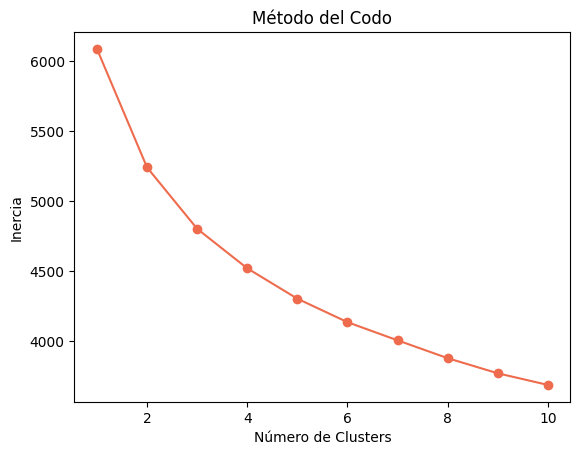

[0.57627119 0.79915254 0.56186441 1.10084746 0.66694915 0.51271186
 0.34576271 0.8059322  0.75508475 0.6220339  0.3779661  0.28220339
 0.71779661 0.64067797 0.35932203 0.78389831 0.21610169]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Realizar el bucle para encontrar el número óptimo de clusters usando el método del codo
inertias = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)








# Graficar la curva del codo
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Entrenar el modelo K-means con el número óptimo de clusters seleccionado por el método del codo
optimal_num_clusters = np.argmin(np.diff(inertias)) + 1
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(df)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Imprimir los centroides
for centroid in centroids:
    print(centroid)

### Silhouette Score

The Silhouette Score is a metric used to evaluate the `quality of clustering results.` It provides a measure of how well each sample in a cluster is assigned to its own cluster compared to other clusters. The Silhouette Score can range from -1 to 1, where:

A score close to +1 indicates that samples are well-clustered, with clear separation between clusters.
A score close to 0 indicates overlapping clusters or that samples are on or very close to the decision boundary between clusters.
A score close to -1 indicates that samples may have been assigned to the wrong clusters.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

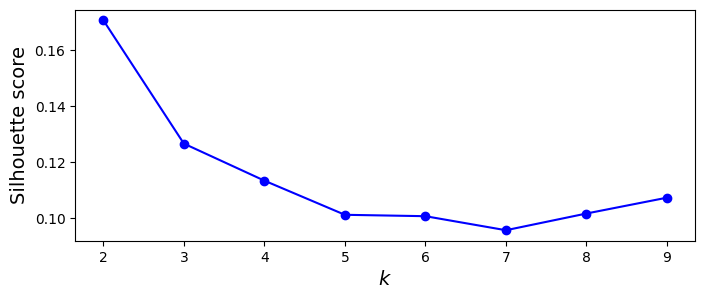

In [30]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1,10)]

silhouette_scores = [silhouette_score(df, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: ylabel='count'>

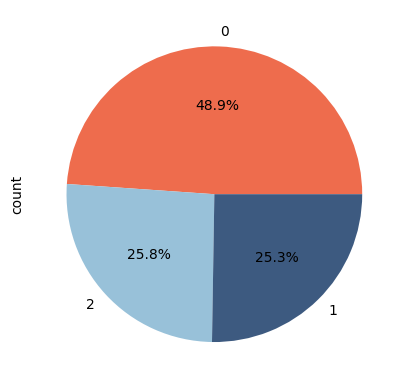

In [31]:
kmeans = KMeans(n_clusters = 3, random_state=42).fit(df)

df = pd.DataFrame({"Data": kmeans.labels_})
df["Data"].value_counts().plot.pie(autopct="%.1f%%")

In [32]:
# Here we can see the N number of centroids of each cluster
kmeans.cluster_centers_

array([[0.12305026, 0.52512998, 0.56499133, 0.98960139, 0.40207972,
        0.4644714 , 0.17850953, 0.77469671, 0.82149047, 0.96533795,
        0.03466205, 0.20277296, 0.79722704, 0.67417678, 0.32582322,
        0.72443674, 0.27556326],
       [1.90268456, 1.0033557 , 0.68456376, 1.04362416, 0.80536913,
        0.61409396, 0.6409396 , 0.83221477, 0.70805369, 0.41610738,
        0.58389262, 0.2852349 , 0.7147651 , 0.56711409, 0.43288591,
        0.79865772, 0.20134228],
       [0.13770492, 1.11803279, 0.43606557, 1.36721311, 1.03278689,
        0.50491803, 0.37377049, 0.83934426, 0.67540984, 0.17377049,
        0.82622951, 0.4295082 , 0.5704918 , 0.64918033, 0.35081967,
        0.88196721, 0.11803279]])

In [126]:

kmeans.cluster_centers_

array([[ 1.18811881e-01,  6.28712871e-01,  3.01980198e-01,
         1.19306931e+00,  5.39603960e-01,  3.76237624e-01,
         2.47524752e-01,  7.67326733e-01,  8.16831683e-01,
         8.01980198e-01,  1.98019802e-01,  2.07920792e-01,
         7.92079208e-01,  0.00000000e+00,  1.00000000e+00,
         6.23762376e-01,  3.76237624e-01],
       [ 1.94604317e+00,  1.02877698e+00,  6.54676259e-01,
         1.06115108e+00,  7.98561151e-01,  6.11510791e-01,
         6.47482014e-01,  8.38129496e-01,  6.97841727e-01,
         3.88489209e-01,  6.11510791e-01,  2.98561151e-01,
         7.01438849e-01,  5.68345324e-01,  4.31654676e-01,
         8.20143885e-01,  1.79856115e-01],
       [ 1.97604790e-01,  6.16766467e-01,  1.37125749e+00,
         2.99401198e-01,  4.67065868e-01,  5.56886228e-01,
         2.09580838e-01,  8.62275449e-01,  8.80239521e-01,
         8.38323353e-01,  1.61676647e-01,  2.21556886e-01,
         7.78443114e-01,  7.18562874e-01,  2.81437126e-01,
         5.14970060e-01,  4.8

In [128]:
# The lesser the model inertia, the better the model fit.
kmeans.inertia_

# We can see that the model has very high inertia. So, this is not a good model fit to the data.

4303.530551400233